In [2]:
import pandas as pd
import numpy as np
from os.path import join

In [3]:
RAW_DATA_PATH = r"C:\Users\shami\Desktop\Master_Thesis_Data\Raw_Data"
PREPARED_DATA_PATH = r"C:\Users\shami\Desktop\Master_Thesis_Data\Prepared_Datasets"
TEST_DATA_PATH = r"C:\Users\shami\Desktop\Master_Thesis_Data\Test_Datasets"
TRAIN_DATA_PATH = r"C:\Users\shami\Desktop\Master_Thesis_Data\Train_Datasets"

## Credit Card Fraud Data

In [8]:
cc_fraud = pd.read_csv(join(RAW_DATA_PATH,"creditcard.csv"))

In [16]:
def get_stats(df:pd.DataFrame, target_col:str):
    d = pd.DataFrame({"Counts": df[target_col].value_counts(),
                      "Percents": (df[target_col].value_counts()/len(df))*100
                    }) 
    d.loc['Total']= d.sum(numeric_only=True, axis=0)
    return d.reset_index()

In [10]:
get_stats(cc_fraud,"Class")

,Class,Counts,Percents
0,0,284315.0,0.998273
1,1,492.0,0.001727
2,Total,284807.0,1.000000


In [17]:
def resample_N(percent, min_class_count):
    return int(((min_class_count*100)/percent)-min_class_count)

In [12]:
cc_fraud_4 = pd.concat(
          [cc_fraud[cc_fraud.Class==0].sample(n=resample_N(4,492), random_state=42),
           cc_fraud[cc_fraud.Class==1]
          ]
)

In [13]:
cc_fraud_3 = pd.concat(
          [cc_fraud[cc_fraud.Class==0].sample(n=resample_N(3,492), random_state=42),
           cc_fraud[cc_fraud.Class==1]
          ]
)

In [14]:
cc_fraud_2 = pd.concat(
          [cc_fraud[cc_fraud.Class==0].sample(n=resample_N(2,492), random_state=42),
           cc_fraud[cc_fraud.Class==1]
          ]
)

In [15]:
cc_fraud_1 = pd.concat(
          [cc_fraud[cc_fraud.Class==0].sample(n=resample_N(1,492), random_state=42),
           cc_fraud[cc_fraud.Class==1]
          ]
)

In [16]:
cc_fraud_05 = pd.concat(
          [cc_fraud[cc_fraud.Class==0].sample(n=resample_N(0.5,492), random_state=42),
           cc_fraud[cc_fraud.Class==1]
          ]
)

In [17]:
cc_fraud_05.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
cc_fraud_4.to_excel(join(PREPARED_DATA_PATH,"cc_fraud_4.xlsx"), index=False)
cc_fraud_3.to_excel(join(PREPARED_DATA_PATH,"cc_fraud_3.xlsx"), index=False)
cc_fraud_2.to_excel(join(PREPARED_DATA_PATH,"cc_fraud_2.xlsx"), index=False)
cc_fraud_1.to_excel(join(PREPARED_DATA_PATH,"cc_fraud_1.xlsx"), index=False)
cc_fraud_05.to_excel(join(PREPARED_DATA_PATH,"cc_fraud_05.xlsx"), index=False)

In [39]:
# get_stats(cc_fraud_05,"Class")
# get_stats(cc_fraud_1,"Class")
# get_stats(cc_fraud_2,"Class")
# get_stats(cc_fraud_3,"Class")
get_stats(cc_fraud_4,"Class")

,Class,Counts,Percents
0,0,11808.0,0.96
1,1,492.0,0.04
2,Total,12300.0,1.00


In [42]:
cc_fraud.shape

(284807, 31)

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
cc_fraud_2_train, cc_fraud_2_test = train_test_split(cc_fraud_2, random_state=42,  
                                                    test_size=0.1, shuffle=True)

In [53]:
cc_fraud_2_train.Class.value_counts()/len(cc_fraud_2_train)

Class
0    0.97972
1    0.02028
Name: count, dtype: float64

In [54]:
cc_fraud_2_test.Class.value_counts()/len(cc_fraud_2_train)

Class
0    0.109169
1    0.001942
Name: count, dtype: float64

In [55]:
cc_fraud_2_test.to_excel(join(TEST_DATA_PATH,"cc_fraud_2_test.xlsx"), index=False)
cc_fraud_2_train.to_excel(join(TRAIN_DATA_PATH,"cc_fraud_2_train.xlsx"), index=False)

## Crime Data

In [4]:
from imblearn.datasets import fetch_datasets

# Fetch dataset from imbalanced-learn library 
 # as a dictionary of numpy array
us_crime = fetch_datasets()['us_crime']

In [5]:
# Convert the dictionary to a pandas dataframe
crime_df = pd.concat([pd.DataFrame(us_crime['data'], columns = [f'data_{i}' for i in range(us_crime.data.shape[1])]),
           pd.DataFrame(us_crime['target'], columns = ['target'])], axis = 1)

In [6]:
crime_df

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,data_91,data_92,data_93,data_94,data_95,data_96,data_97,data_98,data_99,target
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,-1
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,1
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,-1
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,-1
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,-1
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,-1
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,-1
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,-1


## Loan Dataset -- pending

In [40]:
ld = pd.read_csv(join(RAW_DATA_PATH,"rejected_2007_to_2018Q4.csv"))

In [41]:
ld

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
27648736,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
27648737,10000.0,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.0
27648738,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0
27648739,25000.0,2016-12-31,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0.0


In [44]:
ld2 = pd.read_csv(join(RAW_DATA_PATH,"accepted_2007_to_2018Q4.csv"))

C:\Users\shami\AppData\Local\Temp\ipykernel_31364\2333895395.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  ld2 = pd.read_csv(join(RAW_DATA_PATH,"accepted_2007_to_2018Q4.csv"))


In [45]:
ld2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Adult

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [18]:
df = pd.concat([X,y],axis=1)

In [69]:
df.to_excel(join(RAW_DATA_PATH,"Adult.xlsx"), index=False)

In [21]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [35]:
df_2 = df.dropna().copy()
df_2["income_class"] = np.where(df_2.income.str.contains(">50"),1,0)
df_2.drop(columns="income", inplace=True)

In [36]:
get_stats(df_2,"income_class")

,income_class,Counts,Percents
0,0,36080.0,0.757649
1,1,11541.0,0.242351
2,Total,47621.0,1.000000


In [49]:
pd.concat([df_2.nunique(),df_2.dtypes],axis=1)

,0,1
age,74,int64
workclass,9,object
fnlwgt,27946,int64
education,16,object
education-num,16,int64
marital-status,7,object
occupation,15,object
relationship,6,object
race,5,object
sex,2,object


In [50]:
# a lot of uniques in native-country, education can be found from education-num
df_2.drop(columns=["education","native-country"],inplace=True)

In [51]:
pd.concat([df_2.nunique(),df_2.dtypes],axis=1)

,0,1
age,74,int64
workclass,9,object
fnlwgt,27946,int64
education-num,16,int64
marital-status,7,object
occupation,15,object
relationship,6,object
race,5,object
sex,2,object
capital-gain,122,int64


In [55]:
df_ohc = pd.get_dummies(df_2, columns = ["workclass","marital-status","occupation","relationship","race","sex"],
                        dtype=int)

In [58]:
df_ohc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 51 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   47621 non-null  int64
 1   fnlwgt                                47621 non-null  int64
 2   education-num                         47621 non-null  int64
 3   capital-gain                          47621 non-null  int64
 4   capital-loss                          47621 non-null  int64
 5   hours-per-week                        47621 non-null  int64
 6   income_class                          47621 non-null  int32
 7   workclass_?                           47621 non-null  int32
 8   workclass_Federal-gov                 47621 non-null  int32
 9   workclass_Local-gov                   47621 non-null  int32
 10  workclass_Never-worked                47621 non-null  int32
 11  workclass_Private                     47621 no

In [59]:
df_ohc.drop(columns=["workclass_?","marital-status_Married-spouse-absent",
                     "occupation_?","relationship_Not-in-family","race_Other","sex_Female"], inplace=True)

In [60]:
df_ohc

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Husband,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,sex_Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
48837,39,215419,13,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48839,38,374983,13,0,0,50,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
48840,44,83891,13,5455,0,40,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [62]:
df_ohc.shape

(47621, 45)

In [64]:
df_ohc = df_ohc[[col for col in df_ohc.columns if col != 'income_class'] + ['income_class']]

In [65]:
df_ohc

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,sex_Male,income_class
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
48837,39,215419,13,0,0,36,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,38,374983,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
48840,44,83891,13,5455,0,40,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [66]:
df_ohc.to_excel(join(PREPARED_DATA_PATH,"Adult.xlsx"), index=False)

In [67]:
get_stats(df_ohc, "income_class")

,income_class,Counts,Percents
0,0,36080.0,0.757649
1,1,11541.0,0.242351
2,Total,47621.0,1.000000


# Covertype

In [68]:
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [72]:
covtype_raw = pd.concat([X,y],axis=1)

In [73]:
covtype_raw

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [74]:
# covtype_raw.to_excel(join(RAW_DATA_PATH,"Covertype.xlsx"), index=False)

In [75]:
covtype_raw.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0


In [76]:
covtype_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [157]:
get_stats(covtype_raw,"Cover_Type")

,Cover_Type,Counts,Percents
0,2,283301.0,48.759922
1,1,211840.0,36.460521
2,3,35754.0,6.153746
3,7,20510.0,3.530048
4,6,17367.0,2.989095
5,5,9493.0,1.633873
6,4,2747.0,0.472796
7,Total,581012.0,100.000000


In [163]:
covtype_raw["target"] = np.where(covtype_raw.Cover_Type==7,1,0)
covtype_df = covtype_raw.sample(n=50000, random_state=42).drop(columns="Cover_Type")

In [164]:
get_stats(covtype_df,"target")

,target,Counts,Percents
0,0,48263.0,96.526
1,1,1737.0,3.474
2,Total,50000.0,100.000


In [165]:
covtype_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,target
250728,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,1,0,0,0,0,0,0
246788,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,1,0,0
407714,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,1,0,0
25713,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,0
21820,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461544,3245,157,7,309,68,2742,228,241,146,997,...,0,0,0,0,0,0,0,1,0,0
44129,2988,350,9,426,69,5042,203,224,160,5771,...,0,0,0,0,0,0,0,0,0,0
552186,3340,226,21,234,8,1824,187,254,198,3849,...,0,0,0,0,0,0,1,0,0,0
547272,3186,315,4,120,6,4510,209,236,166,966,...,0,0,0,0,0,0,0,1,0,0


In [166]:
covtype_df.to_excel(join(PREPARED_DATA_PATH,"CoverType.xlsx"), index=False)

# Wine dataset

In [82]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [83]:
wine_raw = pd.concat([X,y],axis=1)

In [85]:
wine_raw.to_excel(join(RAW_DATA_PATH,"Wine_Quality.xlsx"), index=False)

In [84]:
wine_raw

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [86]:
wine_raw.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [87]:
wine_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [88]:
get_stats(wine_raw, "quality")

,quality,Counts,Percents
0,6,2836.0,43.650916
1,5,2138.0,32.907496
2,7,1079.0,16.607665
3,4,216.0,3.324611
4,8,193.0,2.970602
5,3,30.0,0.461752
6,9,5.0,0.076959
7,Total,6497.0,100.000000


In [144]:
wine_df = wine_raw.drop(columns="quality").copy()
wine_df["quality"] = np.where(wine_raw.quality>=7,1,0)

In [145]:
get_stats(wine_df, "quality")

,quality,Counts,Percents
0,0,5220.0,80.344775
1,1,1277.0,19.655225
2,Total,6497.0,100.000000


In [161]:
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [160]:
wine_df.to_excel(join(PREPARED_DATA_PATH,"Wine.xlsx"), index=False)

# Nursery Dataset

In [89]:
# fetch dataset 
nursery = fetch_ucirepo(id=76) 
  
# data (as pandas dataframes) 
X = nursery.data.features 
y = nursery.data.targets 
  
# metadata 
print(nursery.metadata) 
  
# variable information 
print(nursery.variables) 


{'uci_id': 76, 'name': 'Nursery', 'repository_url': 'https://archive.ics.uci.edu/dataset/76/nursery', 'data_url': 'https://archive.ics.uci.edu/static/public/76/data.csv', 'abstract': ' Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 12960, 'num_features': 8, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 14 2024', 'dataset_doi': '10.24432/C5P88W', 'creators': ['Vladislav Rajkovic'], 'intro_paper': {'title': 'An application for admission in public school systems', 'authors': 'M. Olave, V. Rajkovic, M. Bohanec', 'published_in': 'Expert Systems in Public Administration', 'year': 1989, 'url': 'https://www.academia.edu/16670755/An_applica

In [90]:
nursery_raw = pd.concat([X,y],axis=1)

In [96]:
nursery_raw.to_excel(join(RAW_DATA_PATH,"Nursery.xlsx"), index=False)

In [91]:
nursery_raw.isna().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

In [92]:
nursery_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [93]:
get_stats(nursery_raw, "class")

,class,Counts,Percents
0,not_recom,4320.0,33.333333
1,priority,4266.0,32.916667
2,spec_prior,4044.0,31.203704
3,very_recom,328.0,2.530864
4,recommend,2.0,0.015432
5,Total,12960.0,100.000000


In [95]:
nursery_raw["class"].unique()

array(['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'],
      dtype=object)

In [131]:
trgt = np.where(nursery_raw["class"].isin(['recommend','very_recom']),1,0)
nursery_df = nursery_raw.drop(columns="class")
nursery_df["class"] = trgt


In [132]:
for col in ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health','class']:
    print(nursery_df[col].unique())

['usual' 'pretentious' 'great_pret']
['proper' 'less_proper' 'improper' 'critical' 'very_crit']
['complete' 'completed' 'incomplete' 'foster']
['1' '2' '3' 'more']
['convenient' 'less_conv' 'critical']
['convenient' 'inconv']
['nonprob' 'slightly_prob' 'problematic']
['recommended' 'priority' 'not_recom']
[1 0]


In [133]:
nursery_df["form"] = nursery_df["form"].replace({'complete':'completed'})
nursery_df["finance"] = nursery_df["finance"].replace({'convenient':1, 'inconv':0})

In [134]:
for col in ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health','class']:
    print(nursery_df[col].unique())

['usual' 'pretentious' 'great_pret']
['proper' 'less_proper' 'improper' 'critical' 'very_crit']
['completed' 'incomplete' 'foster']
['1' '2' '3' 'more']
['convenient' 'less_conv' 'critical']
[1 0]
['nonprob' 'slightly_prob' 'problematic']
['recommended' 'priority' 'not_recom']
[1 0]


In [135]:
nursery_ohc = pd.get_dummies(nursery_df, 
                             columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'social', 'health'],
                             dtype=int)

In [136]:
nursery_ohc

,finance,class,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,...,children_more,housing_convenient,housing_critical,housing_less_conv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,1,1,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,1,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
12956,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,1,0,0
12957,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
12958,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0


In [137]:
nursery_ohc = nursery_ohc[[col for col in nursery_ohc.columns if col != 'class'] + ['class']]

In [141]:
nursery_ohc

,finance,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_completed,...,housing_convenient,housing_critical,housing_less_conv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended,class
0,1,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,1
1,1,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,1
4,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
12956,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
12957,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
12958,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [140]:
nursery_ohc.to_excel(join(PREPARED_DATA_PATH,"Nursery.xlsx"), index=False)

In [142]:
get_stats(nursery_ohc, "class")

,class,Counts,Percents
0,0,12630.0,97.453704
1,1,330.0,2.546296
2,Total,12960.0,100.000000


# Default of credit card clients

In [167]:
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables) 

{'uci_id': 350, 'name': 'Default of credit card clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'The comparisons of data mining techniques for the predictive accuracy of probability of default of cre

In [168]:
c_scoring_raw = pd.concat([X,y],axis=1)

In [170]:
get_stats(c_scoring_raw,"Y")

,Y,Counts,Percents
0,0,23364.0,77.88
1,1,6636.0,22.12
2,Total,30000.0,100.00


In [171]:
c_scoring_raw.to_excel(join(RAW_DATA_PATH,"Taiwan_Credit_Scoring.xlsx"), index=False)

In [172]:
c_scoring_raw.to_excel(join(PREPARED_DATA_PATH,"Taiwan_Credit_Scoring.xlsx"), index=False)

In [173]:
c_scoring_raw.shape

(30000, 24)

# Credit Scoring

In [177]:
cs_df = pd.read_csv(join(RAW_DATA_PATH,"cs-training.csv")).drop(columns = "Unnamed: 0")

In [178]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [180]:
cs_df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [179]:
get_stats(cs_df,"SeriousDlqin2yrs")

,SeriousDlqin2yrs,Counts,Percents
0,0,139974.0,93.316
1,1,10026.0,6.684
2,Total,150000.0,100.000


In [182]:
cs_df.MonthlyIncome.fillna(cs_df.MonthlyIncome.median(), inplace=True)

cs_df.NumberOfDependents.fillna(cs_df.NumberOfDependents.median(), inplace=True)

In [183]:
cs_df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [187]:
cs_df.shape

(150000, 11)

In [185]:
cs_df.to_excel(join(RAW_DATA_PATH,"GMC_Credit_Scoring.xlsx"), index=False)

In [186]:
cs_df.to_excel(join(PREPARED_DATA_PATH,"GMC_Credit_Scoring.xlsx"), index=False)

## Online Shoppers Purchasing Intention Dataset

In [188]:
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 
  
# metadata 
print(online_shoppers_purchasing_intention_dataset.metadata) 
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [189]:
df_ptb = pd.concat([X,y],axis=1)

In [209]:
df_ptb.to_excel(join(RAW_DATA_PATH,"PTB_Online.xlsx"), index=False)

In [190]:
df_ptb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [192]:
df_ptb.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [196]:
df_ptb.VisitorType.value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [193]:
df_ptb.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [194]:
df_ptb.Month.value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [195]:
get_stats(df_ptb,"Revenue")

,Revenue,Counts,Percents
0,False,10422.0,84.525547
1,True,1908.0,15.474453
2,Total,12330.0,100.000000


In [200]:
ptb_ohe = pd.get_dummies(df_ptb, columns=["Month","VisitorType"],
                         dtype=int).drop(columns=["VisitorType_Other", "Month_Dec"])

In [202]:
ptb_ohe["Revenue"] = ptb_ohe.Revenue.astype(int)

In [205]:
get_stats(df_ptb,"Revenue")

,Revenue,Counts,Percents
0,False,10422.0,84.525547
1,True,1908.0,15.474453
2,Total,12330.0,100.000000


In [206]:
ptb_ohe.Weekend.value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

In [207]:
ptb_ohe["Weekend"] = ptb_ohe.Weekend.astype(int)

In [208]:
ptb_ohe.Weekend.value_counts()

Weekend
0    9462
1    2868
Name: count, dtype: int64

In [210]:
ptb_ohe.to_excel(join(PREPARED_DATA_PATH,"PTB_Online.xlsx"), index=False)

In [211]:
ptb_ohe

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1


# Customer propensity to purchase dataset

In [4]:
ptp = pd.read_csv(join(RAW_DATA_PATH,"Propensity_to_purchase.csv")).drop(columns="UserID")

In [5]:
ptp

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
455397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
455398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
455399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [6]:
ptp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   basket_icon_click        455401 non-null  int64
 1   basket_add_list          455401 non-null  int64
 2   basket_add_detail        455401 non-null  int64
 3   sort_by                  455401 non-null  int64
 4   image_picker             455401 non-null  int64
 5   account_page_click       455401 non-null  int64
 6   promo_banner_click       455401 non-null  int64
 7   detail_wishlist_add      455401 non-null  int64
 8   list_size_dropdown       455401 non-null  int64
 9   closed_minibasket_click  455401 non-null  int64
 10  checked_delivery_detail  455401 non-null  int64
 11  checked_returns_detail   455401 non-null  int64
 12  sign_in                  455401 non-null  int64
 13  saw_checkout             455401 non-null  int64
 14  saw_sizecharts           455401 non-

In [7]:
ptp_tr = ptp.sample(n=100000, random_state=42)
ptp_tst = ptp.sample(n=20000, random_state=42)

In [8]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier
from balanced_learn import BalancedLearn

import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from base_learning import BaseLearningAlgorithm
from os.path import join
from learning_algorithms import *
from balancer import *
from utils import *

Traning the model...
Training Done.


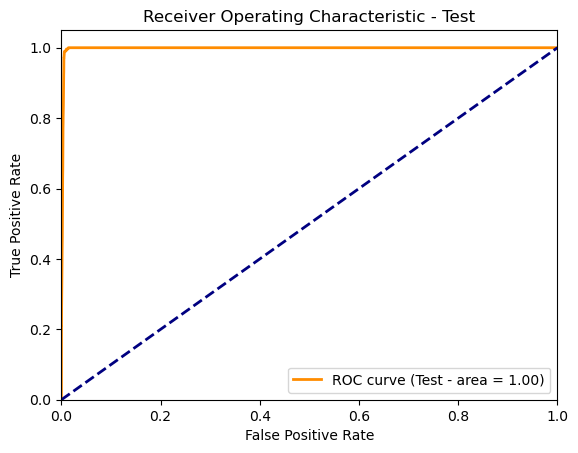

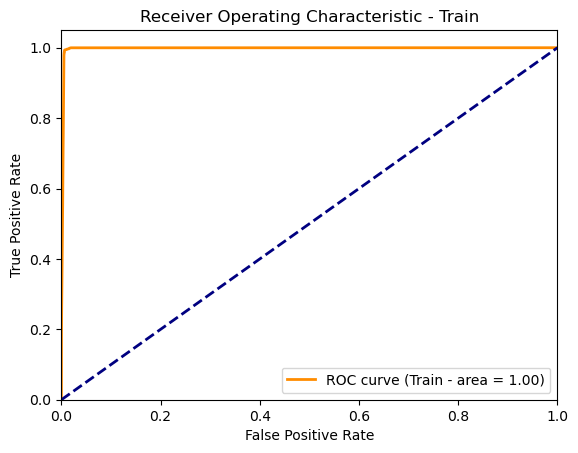

,Model,Dataset,Accuracy,F1 Score,Precision,Recall,AUC Score
0,SVC,Train,0.99387,0.930270,0.878410,0.988636,0.997718
1,SVC,Test,0.99385,0.930153,0.880645,0.985560,0.997932


In [10]:
s = SVMClassifier()
s.train_eval(ptp_tr.drop("ordered",axis=1), ptp_tr["ordered"], ptp_tst.drop("ordered",axis=1), ptp_tst["ordered"])

In [11]:
for col in ptp_tr.columns:
    print("Target for category {}".format(col))
    tbs = pd.crosstab(ptp_tr.ordered, ptp_tr[col])
#     print(tbs)
    chi_sq_test(tbs)
    print("============Strength of Association============")
    cramers_v(tbs)

Target for category basket_icon_click
chi-squared = 18212.495191670594
p value= 0.0
degrees of freedom = 1
============Strength of Association============
V = 0.42676100093226177
Cramer's V Degrees of Freedom = 1

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

Target for category basket_add_list
chi-squared = 8285.045097501972
p value= 0.0
degrees of freedom = 1
============Strength of Association============
V = 0.2878375426781915
Cramer's V Degrees of Freedom = 1

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1        

chi-squared = 83.99821123522581
p value= 4.9522263149412394e-20
degrees of freedom = 1
============Strength of Association============
V = 0.028982444899494902
Cramer's V Degrees of Freedom = 1

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1                 2.0          0.07           0.21          0.35
2                 3.0          0.06           0.17          0.29
3                 4.0          0.05           0.15          0.25
4                 5.0          0.04           0.13          0.22

Target for category saw_account_upgrade
chi-squared = 90.16207908893186
p value= 2.1942764866673573e-21
degrees of freedom = 1
============Strength of Association============
V = 0.03002700103056112
Cramer's V Degrees of Freedom = 1

Effect Size Thresholds
   Degrees of Freedom  Small Effect  Medium Effect  Large Effect
0                 1.0          0.10           0.30          0.50
1   

In [12]:
ptp_prep = ptp.sample(n=130000, random_state=42)

In [13]:
ptp_prep

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
185536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
184949,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
419322,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
274651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
166695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
162979,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,1,0
153250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
87953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [14]:
ptp_prep.to_excel(join(PREPARED_DATA_PATH,"PTP_Data.xlsx"), index=False)

In [18]:
get_stats(ptp_prep, "ordered")

,ordered,Counts,Percents
0,0,124618.0,95.86
1,1,5382.0,4.14
2,Total,130000.0,100.00


In [22]:
phishing = pd.read_excel(join(RAW_DATA_PATH,"phishing_data.xlsx"))
#decided not to add

In [24]:
get_stats(phishing,"label")

,label,Counts,Percents
0,0,48009.0,50.003645
1,1,47904.0,49.894283
2,0.7'8049,1.0,0.001042
3,0.770083,1.0,0.001042
4,Total,95915.0,99.900011


## Pending

In [26]:
mtv = pd.read_csv(join(RAW_DATA_PATH,"metaverse_transactions_dataset.csv"))


In [28]:
get_stats(mtv,"anomaly")

,anomaly,Counts,Percents
0,low_risk,63494.0,80.781170
1,moderate_risk,8611.0,10.955471
2,high_risk,6495.0,8.263359
3,Total,78600.0,100.000000


In [29]:
mtv

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk
78596,2022-02-16 16:15:29,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk
78597,2022-08-04 16:06:42,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk
78598,2022-02-26 04:06:08,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk


## Pending

In [31]:
hotel = pd.read_csv(join(RAW_DATA_PATH,"Hotel Reservations.csv"))



In [33]:
get_stats(hotel, "booking_status")

,booking_status,Counts,Percents
0,Not_Canceled,24390.0,67.236389
1,Canceled,11885.0,32.763611
2,Total,36275.0,100.000000


# Ecom User churn data

In [37]:
churn_df = pd.read_csv(join(RAW_DATA_PATH,"ecom-user-churn-data.csv"))



In [40]:
churn_df.drop(columns = "visitorid")

,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,tran_n,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
0,23.0,16.000000,0.000000,0.000000,39.0,2.0,0.051282,3.0,1.500000,0.0,...,0,0,0,0,3,0,0,0,0,1
1,23.0,61.000000,0.000000,0.000000,85.0,2.0,0.023529,2.0,1.000000,0.0,...,0,0,0,0,0,0,1,0,0,1
2,14.0,0.100000,0.300000,3.000000,21.0,11.0,0.523810,13.0,1.181818,0.0,...,0,0,0,0,0,0,13,0,0,1
3,11.0,13.000000,0.000000,0.000000,24.0,2.0,0.083333,4.0,2.000000,0.0,...,0,0,0,3,1,0,0,0,0,1
4,16.0,26.000000,0.000000,0.000000,43.0,2.0,0.046512,2.0,1.000000,0.0,...,2,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49353,14.0,73.000000,0.000000,0.000000,87.0,2.0,0.022989,2.0,1.000000,0.0,...,0,0,0,2,0,0,0,0,0,1
49354,19.0,13.000000,0.000000,0.000000,32.0,2.0,0.062500,4.0,2.000000,0.0,...,0,2,0,0,0,0,0,2,0,1
49355,21.0,0.666667,0.942809,1.414214,23.0,4.0,0.173913,14.0,3.500000,0.0,...,0,0,0,14,0,0,0,0,0,1
49356,1.0,0.000000,0.000000,-1.000000,2.0,2.0,1.000000,2.0,1.000000,0.0,...,0,2,0,0,0,0,0,0,0,1


In [42]:
churn_df.drop(columns = "visitorid").isna().sum()

ses_rec          0
ses_rec_avg      0
ses_rec_sd       0
ses_rec_cv       0
user_rec         0
ses_n            0
ses_n_r          0
int_n            0
int_n_r          0
tran_n           0
tran_n_r         0
rev_sum          0
rev_sum_r        0
major_spend_r    0
int_cat_n_avg    0
int_itm_n_avg    0
ses_mo_avg       0
ses_mo_sd        0
ses_ho_avg       0
ses_ho_sd        0
ses_wknd_r       0
ses_len_avg      0
time_to_int      0
time_to_tran     0
int_cat1_n       0
int_cat2_n       0
int_cat3_n       0
int_cat4_n       0
int_cat5_n       0
int_cat6_n       0
int_cat7_n       0
int_cat8_n       0
int_cat9_n       0
int_cat10_n      0
int_cat11_n      0
int_cat12_n      0
int_cat13_n      0
int_cat15_n      0
int_cat16_n      0
int_cat17_n      0
int_cat18_n      0
int_cat19_n      0
int_cat20_n      0
int_cat21_n      0
int_cat22_n      0
int_cat23_n      0
int_cat24_n      0
target_class     0
dtype: int64

In [43]:
churn_df.drop(columns = "visitorid").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ses_rec        49358 non-null  float64
 1   ses_rec_avg    49358 non-null  float64
 2   ses_rec_sd     49358 non-null  float64
 3   ses_rec_cv     49358 non-null  float64
 4   user_rec       49358 non-null  float64
 5   ses_n          49358 non-null  float64
 6   ses_n_r        49358 non-null  float64
 7   int_n          49358 non-null  float64
 8   int_n_r        49358 non-null  float64
 9   tran_n         49358 non-null  float64
 10  tran_n_r       49358 non-null  float64
 11  rev_sum        49358 non-null  float64
 12  rev_sum_r      49358 non-null  float64
 13  major_spend_r  49358 non-null  float64
 14  int_cat_n_avg  49358 non-null  float64
 15  int_itm_n_avg  49358 non-null  float64
 16  ses_mo_avg     49358 non-null  float64
 17  ses_mo_sd      49358 non-null  float64
 18  ses_ho

In [41]:
get_stats(churn_df,"target_class")

,target_class,Counts,Percents
0,1,43711.0,88.559099
1,0,5647.0,11.440901
2,Total,49358.0,100.000000


In [47]:
churn_df_p = churn_df.drop(columns = "visitorid")
churn_df_p["target_class"] = np.abs(churn_df_p.target_class - 1)

In [48]:
get_stats(churn_df_p,"target_class")

,target_class,Counts,Percents
0,0,43711.0,88.559099
1,1,5647.0,11.440901
2,Total,49358.0,100.000000


In [49]:
churn_df_p.to_excel(join(PREPARED_DATA_PATH,"Churn_Ecom.xlsx"), index=False)

In [36]:
# https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling churn 20%
# https://www.kaggle.com/datasets/barun2104/telecom-churn churn 14.4%
# https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset?select=train.csv churn 18%
# https://www.kaggle.com/competitions/ai4digigov2021/data?select=queue_dataset_train_small_sample.csv asan xidmet 7.8%
# https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers 16%